In [121]:
%matplotlib inline
from qanta.guesser.wiki_network import *
from functional import seq
import re
import glob
import pickle
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
import pandas as pd

In [2]:
wiki = WikiNetworkGuesser()

In [3]:
db = QuestionDatabase(QB_QUESTION_DB)

Since deep learning does well for questions with many examples, lets only consider questions that have one training example. These would be the most difficult to get correct using traditional learning methods and multi class classification

In [ ]:
qs = db.questions_with_pages()
qs = seq(qs.values()).filter(lambda x: len(x) == 1).flatten().list()

In [ ]:
df = None
for i, q in enumerate(qs[0:200]):
    print('Starting iteration {}'.format(i))
    guesses, seeds = wiki.generate_guesses(q.flatten_text(), q.page.lower().replace(' ', '_'), q.qnum)
    if df is None:
        df = guesses
    else:
        df = pd.concat([df, guesses])

Starting iteration 0
Starting iteration 1


In [18]:
questions = qs[0:200]

In [122]:
with open('wiki_df.pickle', 'wb') as f:
    pickle.dump(df, f)

In [112]:
possible_questions = []
answer_distances = []
mean_distances = []
norm_mean_distances = []
for q in questions:
    f_df = df[df.qnum == q.qnum]
    answer = f_df['answer'].iloc[0]
    page_set = set(f_df['page'])
    if answer in page_set:
        possible_questions.append(q)
        mean = f_df['distance'].mean()
        std = f_df['distance'].std()
        answer_distance = f_df[f_df.page == answer]['distance'].iloc[0]
        mean_distances.append(mean)
        norm_mean_distances.append((answer_distance - mean) / std)
        answer_distances.append(answer_distance)

In [116]:
print('Mean Overall:', np.mean(mean_distances))
print('Mean Answer:', np.mean(answer_distances))
print('Mean Norm:', np.mean(norm_mean_distances))
print('Std Norm:', np.std(norm_mean_distances))

Mean Overall: 14.401825709
Mean Answer: 17.3463447351
Mean Norm: 1.01043037525
Std Norm: 1.1432779869


In [148]:
answer_positions = []
for q in possible_questions:
    f_df = df[df.qnum == q.qnum]
    answer = f_df['answer'].iloc[0]
    answer_distance = f_df[f_df.page == answer]['distance'].iloc[0]
    print('Qnum:', q.qnum)
    print('Answer:', answer)
    print('Answer Distance:', answer_distance)
    print('Mean Distance:', f_df['distance'].mean())
    print('Std Distance:', f_df['distance'].std())
    print('Num Candidates:', len(f_df))
    print('Num to Answer:', len(f_df[f_df.distance >= answer_distance]))
    answer_positions.append(len(f_df[f_df.distance >= answer_distance]))
    print()

Qnum: 212855
Answer: dizzy_gillespie
Answer Distance: 15.65
Mean Distance: 12.687161522998663
Std Distance: 2.692431002623685
Num Candidates: 2819
Num to Answer: 106

Qnum: 202967
Answer: atomic_orbital
Answer Distance: 16.5833333333
Mean Distance: 14.346955843269187
Std Distance: 2.759359815325905
Num Candidates: 1953
Num to Answer: 312

Qnum: 194521
Answer: ahuitzotl
Answer Distance: 16.0595238095
Mean Distance: 15.561693221970556
Std Distance: 2.892540244297074
Num Candidates: 2902
Num to Answer: 1448

Qnum: 197051
Answer: algae
Answer Distance: 14.8166666667
Mean Distance: 9.105566332997096
Std Distance: 1.958924883950674
Num Candidates: 1841
Num to Answer: 1

Qnum: 193236
Answer: american_football
Answer Distance: 8.75
Mean Distance: 6.8016897081413195
Std Distance: 1.4193475029382283
Num Candidates: 992
Num to Answer: 21

Qnum: 195803
Answer: amritsar
Answer Distance: 22.85
Mean Distance: 20.337330852918818
Std Distance: 4.21015766664586
Num Candidates: 3878
Num to Answer: 936

Q

In [158]:
answer_positions = np.array(answer_positions)
n_guesses = [i for i in range(1, 3000)]
recalled = []
for i in n_guesses:
    recalled.append(np.sum(answer_positions <= i))

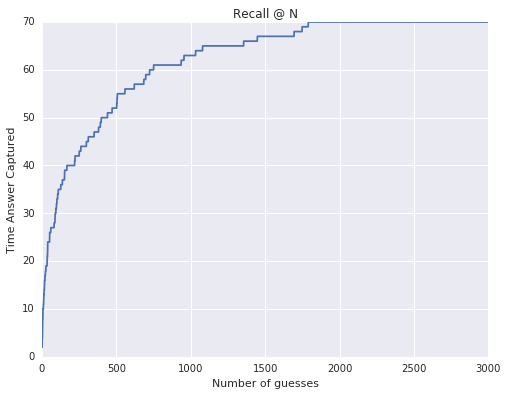

In [167]:
f = plt.plot(n_guesses, recalled)
plt.title('Recall @ N')
plt.xlabel('Number of guesses')
plt.ylabel('Time Answer Captured')
plt.gcf().set_size_inches(8, 6)

In [147]:
df[df.qnum == 189749].sort_values('distance', ascending=False)

,answer,distance,page,qnum,vid
3018,mumbai,18.333333,united_kingdom,189749,5300058
208,mumbai,18.200000,mumbai,189749,3481976
2672,mumbai,18.150000,gujarati_language,189749,2071495
894,mumbai,18.150000,philippines,189749,3942619
1548,mumbai,18.033333,england,189749,1601519
217,mumbai,17.983333,kolkata,189749,2777491
2812,mumbai,17.900000,haryana,189749,2153776
2331,mumbai,17.833333,delhi,189749,1341453
2040,mumbai,17.783333,ahmedabad,189749,242843
2069,mumbai,17.600000,geography_of_india,189749,1922280


(array([  2.,   0.,   2.,  12.,  21.,  22.,   8.,   3.,   0.,   1.]),
 array([  0.        ,   3.58833333,   7.17666667,  10.765     ,
         14.35333333,  17.94166667,  21.53      ,  25.11833333,
         28.70666667,  32.295     ,  35.88333333]),
 <a list of 10 Patch objects>)

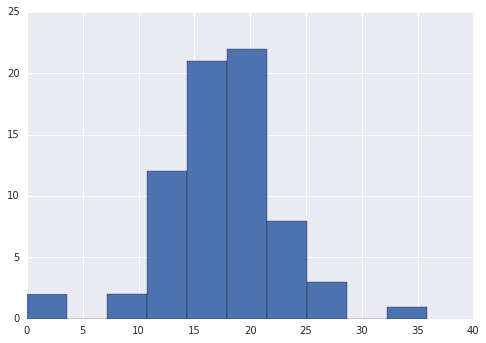

In [108]:
plt.hist(answer_distances)

In [42]:
q = possible_questions[0]
f_df = df[df.qnum == q.qnum]
f_df['distance'].mean()
f_df[f_df.page == q.page]['distance']

IndexError: list index out of range

In [34]:
mean_distances = []
answer_distances = []
for q in possible_questions:
    f_df = df[df.qnum == q.qnum]
    mean_distances.append(f_df['distance'].mean())
    answer_distances.append(f_df[f_df.page == q.page]['distance'][0])
    

IndexError: index out of bounds